<a href="https://colab.research.google.com/github/bbcx-investments/notebooks/blob/main/capm/sml_industries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

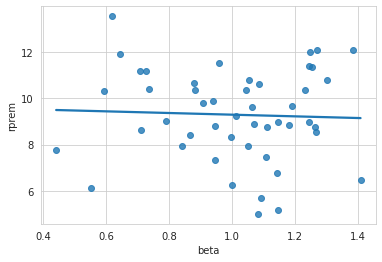

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
sns.set_style('whitegrid')
from pandas_datareader import DataReader as pdr

# get monthly market excess return, risk-free rate, and value-weighted industry returns
ff = pdr('F-F_Research_Data_Factors','famafrench',start=1970)[0] 
df = pdr('48_Industry_Portfolios','famafrench',start=1970)[0] 
inds = df.columns

# merge with market excess return and risk-free rate
df = df.join(ff,how='inner')

# compute excess industry returns
df[inds] = df[inds].subtract(df.RF,axis='index')

# example start date
start = 1980

# compute anualized industry mean excess returns
d1 = df.loc[str(start)+'-01':]
d2 = pd.DataFrame(dtype=float,index=inds,columns=['rprem','beta'])
d2['rprem'] = 12*d1[inds].mean()

# run regressions to compute industry betas
X = sm.add_constant(d1['Mkt-RF'])
for ind in inds :
  d2.loc[ind,'beta'] = sm.OLS(d1[ind],X).fit().params['Mkt-RF']

# plot mean excess returns against betas
sns.regplot(data=d2,x='beta',y='rprem',ci=None)